# Apartments costs regression models

## Packages

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Problem statement

##  Dataset

### Loading

In [2]:
# Load a dataset
raw_data = pd.read_csv("apartments_pl_2023q3.csv")

### Exploraion

In [9]:
# Check the dataset size
raw_data.shape

(19478, 27)

In [6]:
# Get all columns names
raw_data.columns


Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')

In [11]:
# Get sample data from the dataset
raw_data.sample(5)

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
7533,gdansk,tenement,100.65,5.0,1.0,2.0,1910.0,54.381931,18.605442,4.81,...,0.162,condominium,brick,NaN,no,no,no,no,yes,829000
18769,bydgoszcz,NaN,35.00,2.0,2.0,4.0,NaN,53.109450,18.035340,2.70,...,0.142,condominium,NaN,NaN,no,yes,no,no,no,289000
13653,warszawa,blockOfFlats,76.00,4.0,6.0,7.0,1993.0,52.250600,21.039700,3.24,...,0.020,cooperative,NaN,NaN,yes,yes,yes,yes,yes,940000
13865,warszawa,NaN,50.00,2.0,14.0,15.0,2002.0,52.282382,21.065368,7.03,...,0.755,condominium,NaN,NaN,yes,no,yes,yes,no,679000
5890,gdansk,blockOfFlats,60.30,3.0,1.0,4.0,1984.0,54.338830,18.609510,3.14,...,0.249,condominium,concreteSlab,NaN,no,yes,no,no,yes,695000


In [17]:
# Check % of NaN in each column
raw_data.isna().sum() /  100 / len(raw_data)

city                    0.000000
type                    0.002097
squareMeters            0.000000
rooms                   0.000000
floor                   0.001828
floorCount              0.000137
buildYear               0.001711
latitude                0.000000
longitude               0.000000
centreDistance          0.000000
poiCount                0.000000
schoolDistance          0.000007
clinicDistance          0.000045
postOfficeDistance      0.000013
kindergartenDistance    0.000007
restaurantDistance      0.000030
collegeDistance         0.000319
pharmacyDistance        0.000014
ownership               0.000000
buildingMaterial        0.003897
condition               0.007603
hasParkingSpace         0.000000
hasBalcony              0.000000
hasElevator             0.000476
hasSecurity             0.000000
hasStorageRoom          0.000000
price                   0.000000
dtype: float64

## Data preparation

### Data cleaning

In [107]:
# Get only columns we are going to use to build a model
real_estate_df = raw_data[['price','squareMeters', 'centreDistance']]

In [ ]:
"""
Since a linear regression won't work with null values, we may need to get rid of nulls before bulding a model.
Replacing NaNs with 0 won't work in this case because it will mess up the calculations. So I decided to drop rows with NaNs.
We don't have a variable with a lot of missing values, but if there were such variables, I'd consider not choosing it for my model.
"""

In [108]:
# Get rid of rows with NaNs
real_estate_df = real_estate_df.dropna()

In [109]:
# Check % of NaN after dropping
real_estate_df.isna().sum() /  (100 / len(real_estate_df))

price             0.0
squareMeters      0.0
centreDistance    0.0
dtype: float64

In [110]:
"""
The "city" variable has been replaced with city population taken from here: https://www.polskawliczbach.pl/najwieksze_miasta_w_polsce_pod_wzgledem_liczby_ludnosci
"""

'\nThe "city" variable has been replaced with city population taken from here: https://www.polskawliczbach.pl/najwieksze_miasta_w_polsce_pod_wzgledem_liczby_ludnosci\n'

In [111]:
real_estate_df.sample(5)

,price,squareMeters,centreDistance
6761,649000,60.30,3.13
2576,650000,47.00,2.18
8298,590000,38.50,1.04
3243,668000,67.80,6.68
8809,390000,30.61,8.19


### Sampling

In [113]:
real_estate_sampled = real_estate_df.sample(n=500)

## Data vizualization

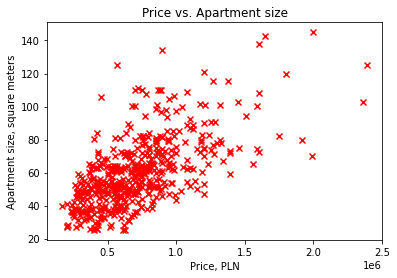

In [114]:
# Create a scatter plot of the data. 
plt.scatter(real_estate_sampled['price'], real_estate_sampled['squareMeters'], marker='x', c='r') 

# Set the title
plt.title("Price vs. Apartment size")
# Set the y-axis label
plt.ylabel('Apartment size, square meters')
# Set the x-axis label
plt.xlabel('Price, PLN')
plt.show()

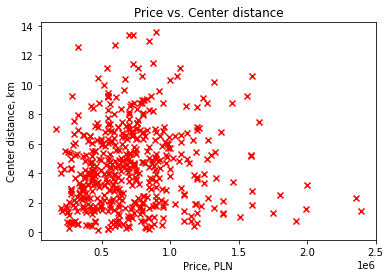

In [115]:
# Create a scatter plot of the data.
plt.scatter(real_estate_sampled['price'], real_estate_sampled['centreDistance'], marker='x', c='r')

# Set the title
plt.title("Price vs. Center distance")
# Set the y-axis label
plt.ylabel('Center distance, km')
# Set the x-axis label
plt.xlabel('Price, PLN')
plt.show()

## Model creation

### Feature scaling

### Compute cost

### Gradient descent

### Batch gradient descent

## Model validation